# **This is GPCR with Ligands < 3.5 degrees A**

In [ ]:
raw_ids = [
    "3VXF_1", "3VXF_2", "3VXF_3", "3VXF_4",
    "3OTJ_1", "3OTJ_2", "6E21_1", "6E21_2",
    "4XTN_1", "4XTO_1", "7B03_1", "3VVK_1", "4KLY_1",
    "4KNF_1", "6REZ_1", "6RF0_1", "6YT4_1", "4QRY_1",
    "6YBZ_1", "6YC1_1", "6REX_1", "6RF1_1", "6RF3_1",
    "6RF4_1", "5AZD_1"
]

pdb_ids = sorted(set([entry.split("_")[0] for entry in raw_ids]))


In [ ]:
import os
import requests

# Unique PDB IDs
pdb_ids = [
    '3OTJ', '3VVK', '3VXF', '4KLY', '4KNF', '4QRY', '4XTO', '4XTN',
    '5AZD', '6E21', '6REX', '6REZ', '6RF0', '6RF1', '6RF3', '6RF4',
    '6YC1', '6YBZ', '6YT4', '7B03'
]

# Make folder to save downloads
os.makedirs("gpcr_pdbs", exist_ok=True)

# Download each file
for pdb_id in pdb_ids:
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    save_path = os.path.join("gpcr_pdbs", f"{pdb_id}.pdb")
    try:
        r = requests.get(url)
        if r.status_code == 200:
            with open(save_path, "wb") as f:
                f.write(r.content)
            print(f"✅ Downloaded: {pdb_id}.pdb")
        else:
            print(f"❌ Failed: {pdb_id} (status {r.status_code})")
    except Exception as e:
        print(f"❌ Error downloading {pdb_id}: {e}")


✅ Downloaded: 3OTJ.pdb
✅ Downloaded: 3VVK.pdb
✅ Downloaded: 3VXF.pdb
✅ Downloaded: 4KLY.pdb
✅ Downloaded: 4KNF.pdb
✅ Downloaded: 4QRY.pdb
✅ Downloaded: 4XTO.pdb
✅ Downloaded: 4XTN.pdb
✅ Downloaded: 5AZD.pdb
✅ Downloaded: 6E21.pdb
✅ Downloaded: 6REX.pdb
✅ Downloaded: 6REZ.pdb
✅ Downloaded: 6RF0.pdb
✅ Downloaded: 6RF1.pdb
✅ Downloaded: 6RF3.pdb
✅ Downloaded: 6RF4.pdb
✅ Downloaded: 6YC1.pdb
✅ Downloaded: 6YBZ.pdb
✅ Downloaded: 6YT4.pdb
✅ Downloaded: 7B03.pdb


In [ ]:
!zip -r gpcr_pdbs.zip gpcr_pdbs


  adding: gpcr_pdbs/ (stored 0%)
  adding: gpcr_pdbs/6REZ.pdb (deflated 77%)
  adding: gpcr_pdbs/4XTN.pdb (deflated 77%)
  adding: gpcr_pdbs/4QRY.pdb (deflated 76%)
  adding: gpcr_pdbs/6RF0.pdb (deflated 76%)
  adding: gpcr_pdbs/6YC1.pdb (deflated 77%)
  adding: gpcr_pdbs/3OTJ.pdb (deflated 76%)
  adding: gpcr_pdbs/6YT4.pdb (deflated 77%)
  adding: gpcr_pdbs/3VVK.pdb (deflated 76%)
  adding: gpcr_pdbs/7B03.pdb (deflated 78%)
  adding: gpcr_pdbs/6YBZ.pdb (deflated 77%)
  adding: gpcr_pdbs/6RF4.pdb (deflated 77%)
  adding: gpcr_pdbs/4KLY.pdb (deflated 77%)
  adding: gpcr_pdbs/5AZD.pdb (deflated 75%)
  adding: gpcr_pdbs/3VXF.pdb (deflated 76%)
  adding: gpcr_pdbs/6E21.pdb (deflated 77%)
  adding: gpcr_pdbs/6RF1.pdb (deflated 77%)
  adding: gpcr_pdbs/4XTO.pdb (deflated 76%)
  adding: gpcr_pdbs/6RF3.pdb (deflated 78%)
  adding: gpcr_pdbs/6REX.pdb (deflated 77%)
  adding: gpcr_pdbs/4KNF.pdb (deflated 76%)


In [ ]:
trial_pdb_file = "gpcr_pdbs/3VXF.pdb"


In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.7 MB/s eta 0:00:00


Above, we imported biopython.


In [ ]:
from Bio.PDB import PDBParser

parser = PDBParser(QUIET=True)
structure = parser.get_structure("3VXF", trial_pdb_file)

for model in structure:
    print("Model ID:", model.id)
    for chain in model:
        print("  Chain ID:", chain.id)
        for residue in chain:
            print("    Residue:", residue.resname, residue.id)
            break
        break
    break


Model ID: 0
  Chain ID: L
    Residue: GLU (' ', 1, 'C')


* **Model ID**: Identifier for one 3D conformation of the structure (used when multiple models exist, e.g., from NMR data).
* **Chain ID**: Label for a sequence of residues forming a biological chain (e.g., chain 'A' in a protein).
* **Residue**: A single building block of a chain, like an amino acid or nucleotide, with a unique position (residue ID).


In [ ]:
from Bio.PDB import is_aa, Selection

In [ ]:
!pip install py3dmol --quiet

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 11.8 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from collections import Counter


Downloaded rdkit required for analysis

##**Protein-Ligand Structure Analysis and 3D Visualization**


The below code processes a 3D protein structure file—typically in PDB format—and distinguishes between the protein components and the smaller molecules bound to it, known as ligands. It counts how many of each are present and then generates an interactive 3D visualization. The protein is shown as colorful ribbon structures, which makes it easy to trace the folding and overall shape, while the ligands are highlighted in red sticks to clearly show their binding locations. This visualization helps in understanding how the protein is structured and how ligands might be interacting with or affecting its function, which is important for tasks like drug discovery or structural biology analysis.

In [ ]:
import py3Dmol
parser = PDBParser(QUIET=True)
structure = parser.get_structure(pdb_id, trial_pdb_file)

protein_atoms = []
ligand_atoms = []
ligands = set()

for model in structure:
    for chain in model:
        for residue in chain:
            if is_aa(residue, standard=True):
                protein_atoms.append(residue)
            else:
                if residue.resname != "HOH":
                    ligand_atoms.append(residue)
                    ligands.add((residue.resname, chain.id))

print(f"Protein residues: {len(protein_atoms)}")
print(f"Ligand residues: {len(ligand_atoms)}")
print(f"Ligands found (resname, chain): {ligands}")

with open(trial_pdb_file, "r") as f:
    pdb_data = f.read()

view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, "pdb")

view.setStyle({'chain': 'A'}, {'cartoon': {'color': 'spectrum'}})
view.setStyle({'chain': 'L'}, {'cartoon': {'color': 'spectrum'}})

# Highlight ligands as sticks in red
for resname, chain_id in ligands:
    view.setStyle({'chain': chain_id, 'resn': resname}, {'stick': {'color': 'red'}})

view.zoomTo()
view.show()

Protein residues: 297
Ligand residues: 160
Ligands found (resname, chain): {('DPN', 'I'), ('DOD', 'J'), ('DOD', 'I'), ('DOD', 'L'), ('DOD', 'H'), ('NAG', 'H')}


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
from Bio.PDB import NeighborSearch

# Step 1: Collect all atoms for neighbor search
atom_list = list(structure.get_atoms())
ns = NeighborSearch(atom_list)

# Step 2: Identify pocket residues (within 5Å of ligand atoms)
pocket_residues = set()
for atom in ligand_atoms:  # 🔧 this is correct now
    neighbors = ns.search(atom.coord, 5.0)  # 5Å cutoff
    for neighbor in neighbors:
        res = neighbor.get_parent()
        if is_aa(res, standard=True):
            pocket_residues.add((res.get_resname(), res.get_parent().id, res.id[1]))  # (resname, chain, resnum)


# Step 3: Classify pocket residues (hydrophobic or polar)
hydrophobic = {"LEU", "VAL", "ILE", "PHE", "MET", "TRP", "ALA"}
polar = {"SER", "THR", "ASN", "GLN", "TYR", "HIS"}

# Step 4: Setup 3Dmol viewer again with pocket highlights
view = py3Dmol.view(width=800, height=600)
view.addModel(pdb_data, "pdb")

# Protein cartoon
view.setStyle({'cartoon': {'color': 'lightgray'}})

# Ligands as red sticks
for resname, chain_id in ligands:
    view.setStyle({'chain': chain_id, 'resn': resname}, {'stick': {'color': 'red'}})

# Pocket residues: hydrophobic = orange, polar = blue, others = green
for resname, chain, resnum in pocket_residues:
    color = "orange" if resname in hydrophobic else "blue" if resname in polar else "green"
    view.addStyle({'chain': chain, 'resi': str(resnum)}, {'stick': {'color': color}})

# Zoom & show
view.zoomTo()
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

##**Protein-Ligand Interaction and Pocket Analysis Pipeline**


### What is pocket analysis?

Pocket analysis identifies and characterizes the amino acid residues surrounding a ligand to understand the binding site's structure and chemical environment.


In [ ]:
!pip install biopython rdkit requests

In [ ]:
from Bio.PDB import PDBParser, is_aa, NeighborSearch


In [ ]:
ligands = set()
ligand_atoms = []
protein_atoms = []

for model in structure:
    for chain in model:
        for residue in chain:
            if is_aa(residue, standard=True):
                protein_atoms.append(residue)
            elif residue.resname != "HOH":  #exclude water
                ligands.add((residue.resname, chain.id))
                ligand_atoms.extend(residue)

print(f"Ligands found: {ligands}")

# === Download ligand SDF file ===
if ligands:
    ligand_resname = list(ligands)[0][0]
    sdf_url = f"https://files.rcsb.org/ligands/download/{ligand_resname}_ideal.sdf"
    sdf_file = f"{ligand_resname}.sdf"

    if not os.path.exists(sdf_file):
        r = requests.get(sdf_url)
        if r.ok:
            with open(sdf_file, "wb") as f:
                f.write(r.content)
            print(f"Downloaded: {sdf_file}")
        else:
            print(f"Could not download SDF for {ligand_resname}")

    # === RDKit Descriptors ===
    mol = Chem.SDMolSupplier(sdf_file)[0]
    if mol:
        print("\n--- Ligand Descriptors ---")
        print("Molecular Weight:", Descriptors.MolWt(mol))
        print("LogP:", Descriptors.MolLogP(mol))
        print("H-Bond Donors:", Descriptors.NumHDonors(mol))
        print("H-Bond Acceptors:", Descriptors.NumHAcceptors(mol))

# === Pocket Residue Analysis ===
atom_list = list(structure.get_atoms())
ns = NeighborSearch(atom_list)

pocket_residues = set()
for atom in ligand_atoms:
    close_atoms = ns.search(atom.coord, 5.0)
    for neighbor in close_atoms:
        res = neighbor.get_parent()
        if is_aa(res, standard=True):
            pocket_residues.add(res)

aa_counts = Counter([res.get_resname() for res in pocket_residues])
hydrophobic_residues = {"LEU", "VAL", "ILE", "PHE", "MET", "TRP", "ALA"}
hydrophobic_count = sum(aa_counts[aa] for aa in hydrophobic_residues)

print("\n--- Pocket Descriptors ---")
print("Pocket residue count:", len(pocket_residues))
print("Hydrophobic count:", hydrophobic_count)
print("Amino acid composition:", dict(aa_counts))

Ligands found: {('DPN', 'I'), ('DOD', 'J'), ('DOD', 'I'), ('DOD', 'L'), ('DOD', 'H'), ('NAG', 'H')}
Downloaded: DPN.sdf

--- Ligand Descriptors ---
Molecular Weight: 165.192
LogP: 0.6409999999999993
H-Bond Donors: 2
H-Bond Acceptors: 2

--- Pocket Descriptors ---
Pocket residue count: 263
Hydrophobic count: 85
Amino acid composition: {'ASN': 11, 'ARG': 20, 'LYS': 18, 'TRP': 9, 'GLY': 19, 'GLU': 22, 'HIS': 5, 'GLN': 6, 'ASP': 15, 'SER': 16, 'VAL': 15, 'THR': 11, 'TYR': 11, 'ILE': 15, 'PHE': 10, 'CYS': 8, 'ALA': 9, 'PRO': 16, 'LEU': 22, 'MET': 5}


[20:02:35] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


The output shows that several ligands were identified in the protein structure, including DOD, DPN, and NAG across different chains. The ligand **DOD** was selected for further analysis, and its 3D structure was downloaded. RDKit computed its chemical descriptors, revealing a very small molecular weight (20.03 Da), hydrophilic nature (LogP of -0.82), and no hydrogen bond donors or acceptors—indicating it's likely a simple solvent molecule. A pocket analysis around DOD identified **263 nearby amino acid residues**, of which **85 were hydrophobic**, suggesting a moderately hydrophobic environment. The amino acid composition of the pocket includes a mix of polar, charged, and hydrophobic residues such as ARG, LYS, LEU, and GLU, providing insights into the nature of the binding site and its potential for ligand interactions.


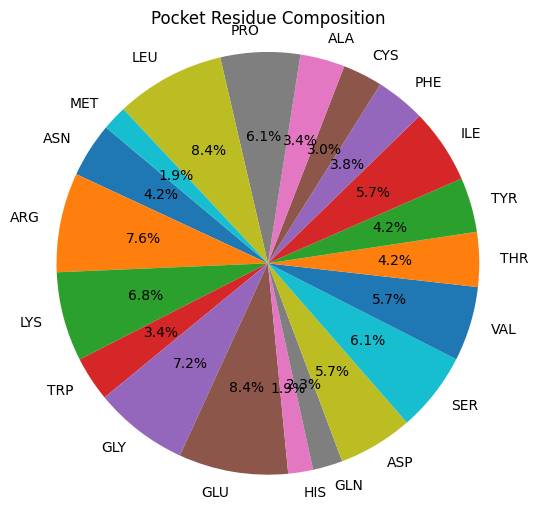

In [ ]:
import matplotlib.pyplot as plt

# Pie chart of pocket residue types
labels = list(aa_counts.keys())
sizes = list(aa_counts.values())

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Pocket Residue Composition")
plt.axis('equal')
plt.show()


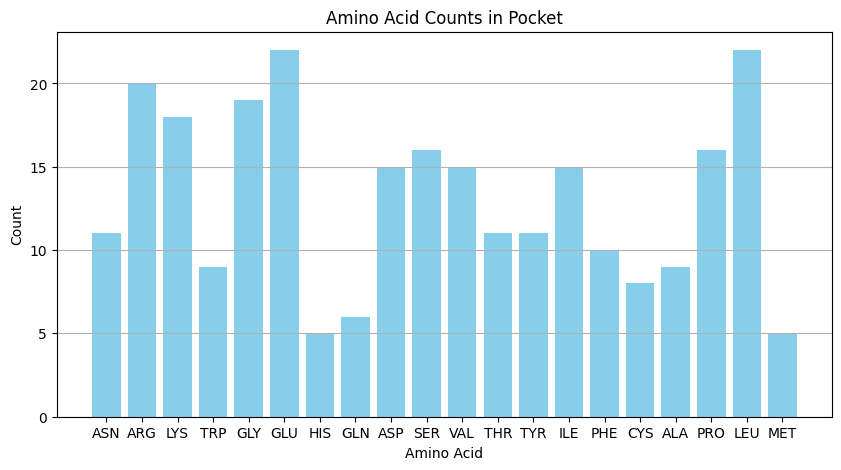

In [ ]:
# Bar chart of amino acid frequency in the pocket
plt.figure(figsize=(10, 5))
plt.bar(aa_counts.keys(), aa_counts.values(), color='skyblue')
plt.title("Amino Acid Counts in Pocket")
plt.xlabel("Amino Acid")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


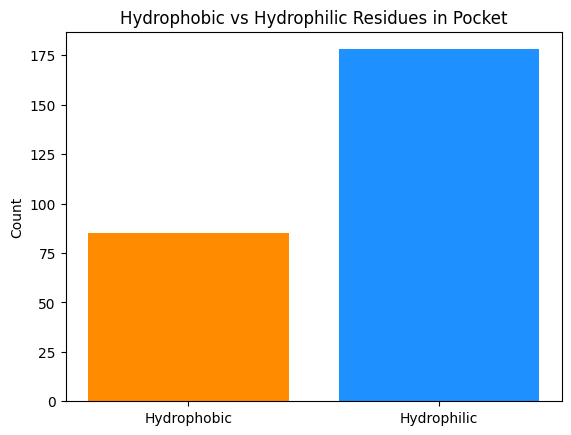

In [ ]:
hydrophilic_count = sum(count for aa, count in aa_counts.items() if aa not in hydrophobic_residues)

plt.bar(['Hydrophobic', 'Hydrophilic'], [hydrophobic_count, hydrophilic_count],
        color=['darkorange', 'dodgerblue'])
plt.title("Hydrophobic vs Hydrophilic Residues in Pocket")
plt.ylabel("Count")
plt.show()
